# Mean Difference with Temperature Dataset

Finding mean difference between four models for DJF seaoson.

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
from pandas import Series

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.geoaxes import GeoAxes

### Loading datasets

In [21]:
# temperature wrf datasets
ds_wrf_1980 = xr.open_dataset('./input_files/DOE_VIC.narr_wrf.monthly.tas.1980-2012.nc')
ds_wrf_2091 = xr.open_dataset('./input_files/DOE_VIC.narr_wrf.monthly.tas.2091-2100.nc')

# temperature loca_wrf
ds_loca_wrf_1980 = xr.open_dataset('./input_files/DOE_VIC.narr_LOCA_wrf.monthly.tas.1980-2012.nc')
ds_loca_wrf_2091 = xr.open_dataset('./input_files/DOE_VIC.narr_LOCA_wrf.monthly.tas.2091-2100.nc')

# Temperature _loca_14
ds_loca_14_1980 = xr.open_dataset('./input_files/DOE_VIC.narr_LOCA_L14.monthly.tas.1980-2012.nc')
ds_loca_14_2091 = xr.open_dataset('./input_files/DOE_VIC.narr_LOCA_L14.monthly.tas.2091-2100.nc')

# Temperature _bcsd_L14
ds_bcsd_L14_1980 = xr.open_dataset('./input_files/DOE_VIC.narr_BCSD_L14.monthly.tas.1980-2012.nc')
ds_bcsd_L14_2091 = xr.open_dataset('./input_files/DOE_VIC.narr_BCSD_L14.monthly.tas.2091-2100.nc')

In [4]:
# Export to pandas and check for not null values
#ds_wrf_1980['tas']
#test_df = ds_wrf_1980.to_dataframe()
#test_df[test_df['tas'].notnull()]

In [9]:
tas_wrf_from_1991 = ds_wrf_1980['tas'].sel(time=slice('1991-01-01', '2000-12-31'))
tas_loca_wrf_from_1991 = ds_loca_wrf_1980['tas'].sel(time=slice('1991-01-01','2000-12-31'))
tas_loca_14_from_1991 = ds_loca_14_1980['tas'].sel(time=slice('1991-01-01','2000-12-31'))
tas_bcsd_L14_from_1991 = ds_bcsd_L14_1980['tas'].sel(time=slice('1991-01-01', '2000-12-31'))

#### Mean difference of narr_wrf

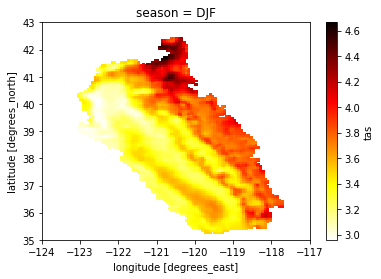

In [14]:
str_groupby = 'time.season'
tas_wrf_1991 = tas_wrf_from_1991.groupby('time.season').mean('time')
tas_wrf_2091 = ds_wrf_2091['tas'].groupby('time.season').mean('time')
mean_diff_wrf_1991_2091 = (tas_wrf_2091.sel(season='DJF') - tas_wrf_1991.sel(season='DJF'))  
mean_diff_wrf_1991_2091.plot(cmap='hot_r')

#### Mean difference of narr_loca_wrf

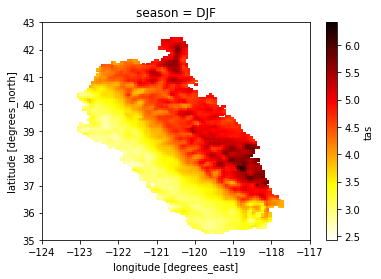

In [15]:
tas_loca_wrf_1991 = tas_loca_wrf_from_1991.groupby('time.season').mean('time')
tas_loca_wrf_2091 = ds_loca_wrf_2091['tas'].groupby('time.season').mean('time')
mean_diff_loca_wrf_1991_2091 = (tas_loca_wrf_2091.sel(season='DJF') - tas_loca_wrf_1991.sel(season='DJF'))
mean_diff_loca_wrf_1991_2091.plot(cmap='hot_r')

#### Mean difference of narr_loca_14

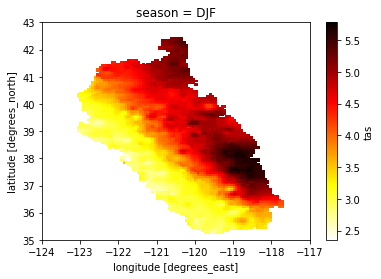

In [16]:
tas_loca_14_1991 = tas_loca_14_from_1991.groupby('time.season').mean('time')
tas_loca_14_2091 = ds_loca_14_2091['tas'].groupby('time.season').mean('time')
mean_diff_loca_14_1991_2091 = ((tas_loca_14_2091.sel(season='DJF') - tas_loca_14_1991.sel(season='DJF')))
mean_diff_loca_14_1991_2091.plot(cmap='hot_r')

#### Mean difference of narr_bcsd_L14

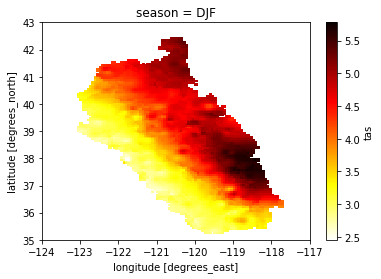

In [17]:
tas_bcsd_L14_1991 = tas_bcsd_L14_from_1991.groupby('time.season').mean('time')
tas_bcsd_L14_2091 = ds_bcsd_L14_2091['tas'].groupby('time.season').mean('time')
mean_diff_bcsd_L14_1991_2091 = (tas_loca_14_2091.sel(season='DJF') - tas_bcsd_L14_1991 .sel(season='DJF'))
mean_diff_bcsd_L14_1991_2091.plot(cmap='hot_r')

## Multi-plots

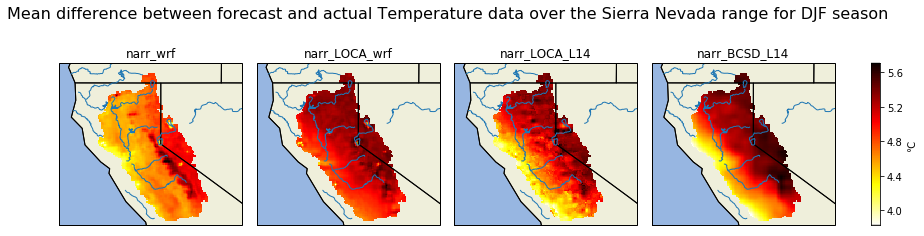

In [20]:
# figsize=(18, 8)
#fig, axes = plt.subplots(nrows=1, ncols=4 )



mean_list = [mean_diff_wrf_1991_2091, mean_diff_loca_wrf_1991_2091, mean_diff_loca_14_1991_2091, mean_diff_bcsd_L14_1991_2091]
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(1, 4),
                axes_pad = 0.2,
                cbar_location="right",
                cbar_mode="single",
                cbar_pad=0.5,
                label_mode='',
                share_all=True
                
               )
cbar_label_title = '℃'


for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.set_extent([-125, -116, 43, 35])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')    
    test_plt = mean_list[i].plot.pcolormesh(ax=axgr[i], transform=ccrs.PlateCarree(), x='longitude', y='latitude', cmap='hot_r', add_colorbar=False)
    
    

axgr[0].set_title('narr_wrf')
axgr[1].set_title('narr_LOCA_wrf')
axgr[2].set_title('narr_LOCA_L14')
axgr[3].set_title('narr_BCSD_L14')

#make_axes_area_auto_adjustable(axgr[0], pad=0.2, use_axes=[axgr[0], axgr[1], axgr[2], axgr[3]])
fig.subplots_adjust(left=0.14, top=1.64)
fig.suptitle('Mean difference between forecast and actual Temperature data over the Sierra Nevada range for DJF season', fontsize=16, y=1.01)
cb = axgr.cbar_axes[0].colorbar(test_plt)
cb.set_label_text(cbar_label_title)



## Multi-plots with seasonal variations for each model

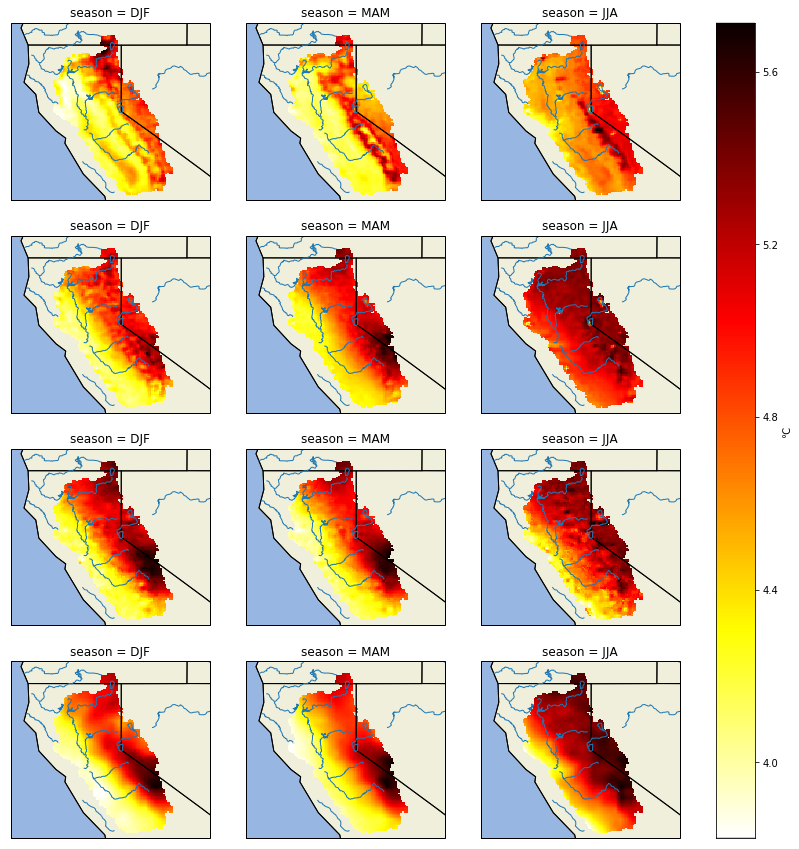

In [19]:
#fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14,12))
#mean_list = [mean_diff_wrf_1990_2091, mean_diff_loca_wrf_1990_2091, mean_diff_loca_14_1990_2091, mean_diff_bcsd_L14_1990_2091]
projection = ccrs.PlateCarree()
axes_class = (GeoAxes, dict(map_projection=projection))
fig = plt.figure(figsize=(15, 15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
               nrows_ncols=(4, 3),
               axes_pad = 0.5,
                cbar_location="right",
                    cbar_mode="single",
                share_all=False,
               label_mode='')
cbar_label_title = '℃'

for i, season in enumerate(('DJF', 'MAM', 'JJA')):
    mean_diff_wrf_1991_2091 = ((tas_wrf_2091.sel(season=season) - tas_wrf_1991.sel(season=season))) 
    mean_diff_loca_wrf_1991_2091 = ((tas_loca_wrf_2091.sel(season=season) - tas_loca_wrf_1991.sel(season=season)))
    mean_diff_loca_14_1991_2091 = ((tas_loca_14_2091.sel(season=season) - tas_loca_14_1991.sel(season=season)))
    mean_diff_bcsd_L14_1991_2091 = ((tas_bcsd_L14_2091.sel(season=season) - tas_bcsd_L14_1991.sel(season=season)))
    
    test_plt_month = mean_diff_wrf_1991_2091.plot.pcolormesh(ax=axgr[i], add_colorbar=False, x='longitude', y='latitude', cmap='hot_r')
    test_plt_month = mean_diff_loca_wrf_1991_2091.plot.pcolormesh(ax=axgr[3+i], add_colorbar=False, x='longitude', y='latitude', cmap='hot_r')
    test_plt_month = mean_diff_loca_14_1991_2091.plot.pcolormesh(ax=axgr[6+i], add_colorbar=False, x='longitude', y='latitude', cmap='hot_r')
    test_plt_month = mean_diff_bcsd_L14_1991_2091.plot.pcolormesh(ax=axgr[9+i], add_colorbar=False, x='longitude', y='latitude', cmap='hot_r')
    
for i, ax in enumerate(axgr):
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.STATES)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.LAKES)
    ax.set_extent([-125, -116, 43, 35])
    ax.add_feature(cfeature.LAND)
    ax.add_feature(cfeature.LAKES.with_scale('10m'), facecolor='none', edgecolor='tab:blue')
    ax.add_feature(cfeature.RIVERS.with_scale('10m'), edgecolor='tab:blue')
    

cb = axgr.cbar_axes[0].colorbar(test_plt_month)
cb.set_label_text(cbar_label_title)
